# Predictive Analytics for Retail Banking

Analytics is helping the banking industry become smarter in managing the myriad challenges.

Challenges:
- What is a suitable product to recommend to a customer?
- What is the best time to market the product?
- Which is the most effective channel to contact a customer?

The data is related with direct marketing campaigns of a banking institution. The marketing campaigns were based on phone alls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
The goal is to predict if the client will subscribe a term deposit

In [1]:
# Import all required libraries for reading data, analysing and visualizing data

import numpy as np
import pandas as pd

In [2]:
# Read the training & test data
data = pd.read_csv("bank97.csv")

In [3]:
# Top 5 rows of the dataset

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,39,blue-collar,married,primary,no,-119,no,no,unknown,17,jun,135,6,-1,0,unknown,no
1,31,technician,single,secondary,no,373,no,no,cellular,22,aug,346,5,-1,0,unknown,no
2,30,services,married,secondary,no,292,yes,yes,cellular,15,apr,651,4,-1,0,unknown,no
3,55,technician,divorced,secondary,yes,284,yes,no,cellular,7,aug,78,2,-1,0,unknown,no
4,32,management,single,tertiary,no,311,no,no,unknown,12,may,757,2,-1,0,unknown,yes


In [4]:
data['default'].replace(['yes','no'],[1,0],inplace=True)
data['housing'].replace(['yes','no'],[1,0],inplace=True)
data['loan'].replace(['yes','no'],[1,0],inplace=True)
data['deposit'].replace(['yes','no'],[1,0],inplace=True)

In [5]:
data["month"].unique()

array(['jun', 'aug', 'apr', 'may', 'jul', 'mar', 'oct', 'jan', 'nov',
       'sep', 'feb', 'dec'], dtype=object)

In [6]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,39,blue-collar,married,primary,0,-119,0,0,unknown,17,jun,135,6,-1,0,unknown,0
1,31,technician,single,secondary,0,373,0,0,cellular,22,aug,346,5,-1,0,unknown,0
2,30,services,married,secondary,0,292,1,1,cellular,15,apr,651,4,-1,0,unknown,0
3,55,technician,divorced,secondary,1,284,1,0,cellular,7,aug,78,2,-1,0,unknown,0
4,32,management,single,tertiary,0,311,0,0,unknown,12,may,757,2,-1,0,unknown,1


In [7]:
data=data.rename(columns={'default':'defaulter','previous':'prev'})

In [8]:
data["job"].unique()

array(['blue-collar', 'technician', 'services', 'management', 'admin.',
       'entrepreneur', 'unemployed', 'self-employed', 'retired',
       'housemaid', 'student', 'unknown'], dtype=object)

In [9]:
data

,age,job,marital,education,defaulter,balance,housing,loan,contact,day,month,duration,campaign,pdays,prev,poutcome,deposit
0,39,blue-collar,married,primary,0,-119,0,0,unknown,17,jun,135,6,-1,0,unknown,0
1,31,technician,single,secondary,0,373,0,0,cellular,22,aug,346,5,-1,0,unknown,0
2,30,services,married,secondary,0,292,1,1,cellular,15,apr,651,4,-1,0,unknown,0
3,55,technician,divorced,secondary,1,284,1,0,cellular,7,aug,78,2,-1,0,unknown,0
4,32,management,single,tertiary,0,311,0,0,unknown,12,may,757,2,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,47,management,married,tertiary,0,761,1,0,cellular,11,jul,80,2,-1,0,unknown,0
10823,28,self-employed,single,tertiary,0,159,0,0,cellular,16,nov,449,2,33,4,success,1
10824,35,technician,married,secondary,0,1144,0,0,cellular,20,aug,197,13,-1,0,unknown,0
10825,51,retired,married,tertiary,0,746,0,0,cellular,25,aug,372,5,-1,0,unknown,1


In [10]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
defaulter    0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
prev         0
poutcome     0
deposit      0
dtype: int64

In [11]:
data.describe()

,age,defaulter,balance,housing,loan,day,duration,campaign,pdays,prev,deposit
count,10827.000000,10827.000000,10827.000000,10827.000000,10827.000000,10827.000000,10827.000000,10827.000000,10827.000000,10827.000000,10827.000000
mean,41.241711,0.014686,1515.509098,0.473815,0.130507,15.656599,372.065484,2.508728,51.282165,0.831717,0.473631
std,11.890995,0.120296,3213.728385,0.499337,0.336876,8.415440,347.035076,2.719709,108.593035,2.297827,0.499327
min,18.000000,0.000000,-6847.000000,0.000000,0.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,0.000000,122.000000,0.000000,0.000000,8.000000,138.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,549.000000,0.000000,0.000000,15.000000,255.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,0.000000,1698.000000,1.000000,0.000000,22.000000,498.000000,3.000000,17.000000,1.000000,1.000000
max,95.000000,1.000000,81204.000000,1.000000,1.000000,31.000000,3881.000000,63.000000,854.000000,58.000000,1.000000


In [12]:
# To get a concise summary of the dataframe

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10827 entries, 0 to 10826
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        10827 non-null  int64 
 1   job        10827 non-null  object
 2   marital    10827 non-null  object
 3   education  10827 non-null  object
 4   defaulter  10827 non-null  int64 
 5   balance    10827 non-null  int64 
 6   housing    10827 non-null  int64 
 7   loan       10827 non-null  int64 
 8   contact    10827 non-null  object
 9   day        10827 non-null  int64 
 10  month      10827 non-null  object
 11  duration   10827 non-null  int64 
 12  campaign   10827 non-null  int64 
 13  pdays      10827 non-null  int64 
 14  prev       10827 non-null  int64 
 15  poutcome   10827 non-null  object
 16  deposit    10827 non-null  int64 
dtypes: int64(11), object(6)
memory usage: 1.4+ MB


In [13]:
numeric_data = data.select_dtypes(include=['number'])
numeric_data.cov()

,age,defaulter,balance,housing,loan,day,duration,campaign,pdays,prev,deposit
age,141.395755,-0.012695,4.336795e+03,-1.005448,-0.119115,-0.068661,5.503291,-0.197334,1.340253,0.428265,0.211944
defaulter,-0.012695,0.014471,-2.314298e+01,0.000708,0.003071,0.015943,-0.465030,0.009063,-0.451124,-0.009444,-0.002338
balance,4336.795094,-23.142984,1.032805e+07,-121.663188,-90.767722,245.358011,25904.352120,-114.418540,5224.940025,226.065359,129.714331
housing,-1.005448,0.000708,-1.216632e+02,0.249337,0.012978,-0.067648,6.276932,0.007780,3.578837,0.002151,-0.050594
loan,-0.119115,0.003071,-9.076772e+01,0.012978,0.113485,0.050732,-0.808935,0.031791,-1.036920,-0.017016,-0.018589
day,-0.068661,0.015943,2.453580e+02,-0.067648,0.050732,70.819623,-48.642946,3.191895,-74.464522,-1.151273,-0.237857
duration,5.503291,-0.465030,2.590435e+04,6.276932,-0.808935,-48.642946,120433.343855,-39.031377,-953.871333,-20.957850,78.875965
campaign,-0.197334,0.009063,-1.144185e+02,0.007780,0.031791,3.191895,-39.031377,7.396816,-30.138848,-0.308433,-0.172987
pdays,1.340253,-0.451124,5.224940e+03,3.578837,-1.036920,-74.464522,-953.871333,-30.138848,11792.447348,126.328848,8.312494
prev,0.428265,-0.009444,2.260654e+02,0.002151,-0.017016,-1.151273,-20.957850,-0.308433,126.328848,5.280010,0.160720


In [14]:
numeric_data.corr()

,age,defaulter,balance,housing,loan,day,duration,campaign,pdays,prev,deposit
age,1.000000,-0.008875,0.113486,-0.169335,-0.029736,-0.000686,0.001334,-0.006102,0.001038,0.015674,0.035696
defaulter,-0.008875,1.000000,-0.059863,0.011784,0.075787,0.015749,-0.011139,0.027700,-0.034534,-0.034166,-0.038917
balance,0.113486,-0.059863,1.000000,-0.075815,-0.083840,0.009072,0.023227,-0.013091,0.014972,0.030613,0.080834
housing,-0.169335,0.011784,-0.075815,1.000000,0.077151,-0.016098,0.036223,0.005729,0.066000,0.001875,-0.202916
loan,-0.029736,0.075787,-0.083840,0.077151,1.000000,0.017895,-0.006919,0.034698,-0.028345,-0.021982,-0.110507
day,-0.000686,0.015749,0.009072,-0.016098,0.017895,1.000000,-0.016656,0.139460,-0.081484,-0.059537,-0.056605
duration,0.001334,-0.011139,0.023227,0.036223,-0.006919,-0.016656,1.000000,-0.041354,-0.025311,-0.026282,0.455183
campaign,-0.006102,0.027700,-0.013091,0.005729,0.034698,0.139460,-0.041354,1.000000,-0.102047,-0.049354,-0.127381
pdays,0.001038,-0.034534,0.014972,0.066000,-0.028345,-0.081484,-0.025311,-0.102047,1.000000,0.506271,0.153301
prev,0.015674,-0.034166,0.030613,0.001875,-0.021982,-0.059537,-0.026282,-0.049354,0.506271,1.000000,0.140077


In [15]:
data.pivot_table(numeric_data,index="job")

,age,balance,campaign,day,defaulter,deposit,duration,housing,loan,pdays,prev
job,,,,,,,,,,,
admin.,39.474576,1197.163328,2.368259,15.334361,0.007704,0.475347,349.755008,0.551618,0.176425,64.264253,0.983821
blue-collar,39.444859,1181.914225,2.541822,15.255727,0.020245,0.364411,393.272776,0.685136,0.173681,44.337773,0.638253
entrepreneur,43.034700,1562.611987,2.753943,15.299685,0.028391,0.362776,359.432177,0.501577,0.205047,33.451104,0.552050
housemaid,47.532075,1365.815094,2.705660,16.313208,0.030189,0.400000,342.875472,0.275472,0.067925,33.615094,0.501887
management,40.218437,1780.230060,2.595190,15.745892,0.014830,0.505411,362.024850,0.418036,0.100601,54.223647,0.925050
retired,65.327609,2440.286658,2.117569,15.541612,0.006605,0.663144,391.624835,0.158520,0.072655,52.570674,0.957728
self-employed,39.772152,1886.030380,2.541772,15.962025,0.020253,0.460759,392.030380,0.435443,0.139241,45.200000,0.779747
services,38.187010,1061.008959,2.581187,15.779395,0.007839,0.400896,389.098544,0.610302,0.170213,50.734602,0.667413
student,26.174785,1432.438395,2.171920,15.240688,0.002865,0.744986,331.679083,0.146132,0.002865,70.653295,1.332378


In [16]:
data.pivot_table(numeric_data,index='month')

,age,balance,campaign,day,defaulter,deposit,duration,housing,loan,pdays,prev
month,,,,,,,,,,,
apr,40.359955,1729.874016,1.840270,18.569179,0.007874,0.622047,401.688414,0.520810,0.089989,80.753656,0.983127
aug,42.828475,1561.949153,3.512542,15.517966,0.013559,0.453559,352.448136,0.181695,0.081356,32.736271,0.627797
dec,45.869159,2645.271028,2.186916,14.196262,0.000000,0.906542,402.457944,0.177570,0.028037,112.691589,2.242991
feb,41.853918,1564.274900,2.160691,8.621514,0.006640,0.565737,340.112882,0.326693,0.115538,72.997344,1.321381
jan,42.519520,1157.441441,1.738739,25.738739,0.018018,0.414414,353.633634,0.237237,0.135135,59.594595,1.279279
jul,41.215847,1043.724727,3.308743,18.460383,0.028689,0.415984,418.535519,0.441257,0.266393,24.773224,0.373634
jun,41.516484,1579.423500,2.826712,11.282333,0.020287,0.448859,364.464074,0.361792,0.114117,22.447168,0.510566
mar,43.244361,2143.439850,2.003759,13.342105,0.000000,0.894737,286.150376,0.233083,0.048872,64.676692,1.210526
may,38.702762,1184.290698,2.332122,15.514898,0.014535,0.326672,378.564317,0.841206,0.132994,56.035610,0.726381


In [17]:
data.pivot_table(numeric_data,index='marital')

,age,balance,campaign,day,defaulter,deposit,duration,housing,loan,pdays,prev
marital,,,,,,,,,,,
divorced,47.420382,1365.987261,2.450637,15.670382,0.020701,0.484873,396.062898,0.482484,0.153662,46.617038,0.651274
married,44.503161,1580.067596,2.620846,15.655860,0.014103,0.433296,360.506727,0.489220,0.143783,49.387421,0.819420
single,33.046443,1453.644915,2.326867,15.652851,0.013521,0.542622,384.165785,0.442681,0.097884,56.440329,0.920635


In [18]:
data.pivot_table(numeric_data,index='education')

,age,balance,campaign,day,defaulter,deposit,duration,housing,loan,pdays,prev
education,,,,,,,,,,,
primary,48.216942,1512.055785,2.655647,15.530303,0.019972,0.389118,381.336088,0.494490,0.136364,39.889118,0.676997
secondary,40.111885,1285.566585,2.466943,15.592390,0.014692,0.448107,373.719721,0.535694,0.158222,53.307591,0.820494
tertiary,39.547964,1828.708031,2.488288,15.754044,0.012549,0.540714,368.888455,0.390686,0.097602,52.800613,0.925544
unknown,45.291667,1729.358333,2.679167,16.020833,0.014583,0.510417,349.460417,0.347917,0.052083,52.000000,0.722917


In [19]:
data['deposit'].value_counts()

0    5699
1    5128
Name: deposit, dtype: int64

# EDA

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'balance')

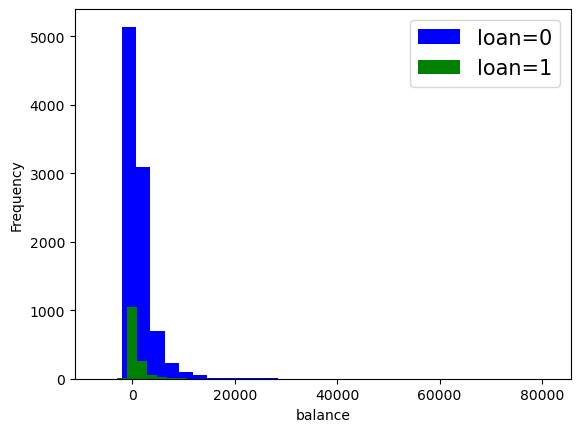

In [21]:
data[data['loan']==0]['balance'].plot.hist(bins=30,color='blue', label='loan=0')
data[data['loan']==1]['balance'].plot.hist(bins=30, color='green', label='loan=1')
plt.legend(fontsize=15)
plt.xlabel("balance")

Text(0.5, 0, 'age')

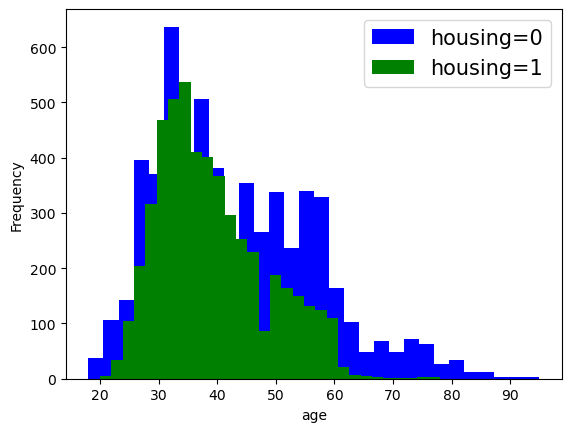

In [22]:
data[data['housing']==0]['age'].plot.hist(bins=30,color='blue', label='housing=0')
data[data['housing']==1]['age'].plot.hist(bins=30, color='green', label='housing=1')
plt.legend(fontsize=15)
plt.xlabel("age")

Text(0.5, 0, 'duration')

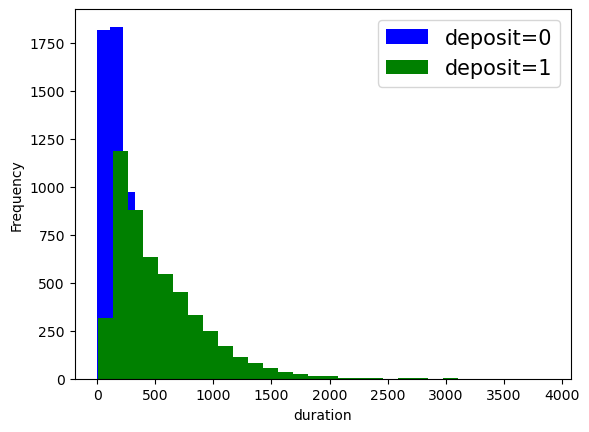

In [23]:
data[data['deposit']==0]['duration'].plot.hist(bins=30,color='blue', label='deposit=0')
data[data['deposit']==1]['duration'].plot.hist(bins=30, color='green', label='deposit=1')
plt.legend(fontsize=15)
plt.xlabel("duration")

Text(0, 0.5, 'balance')

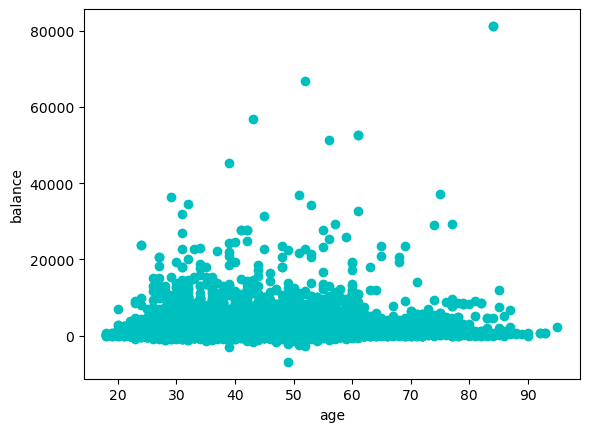

In [24]:
%matplotlib inline
plt.scatter(data["age"],data["balance"],color="c")
plt.xlabel("age")
plt.ylabel("balance")

<Axes: >

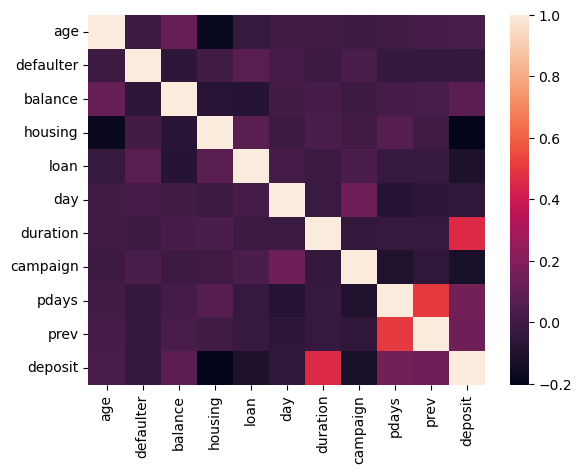

In [25]:
import seaborn as sns
sns.heatmap(numeric_data.corr())

Text(0.5, 0, 'month')

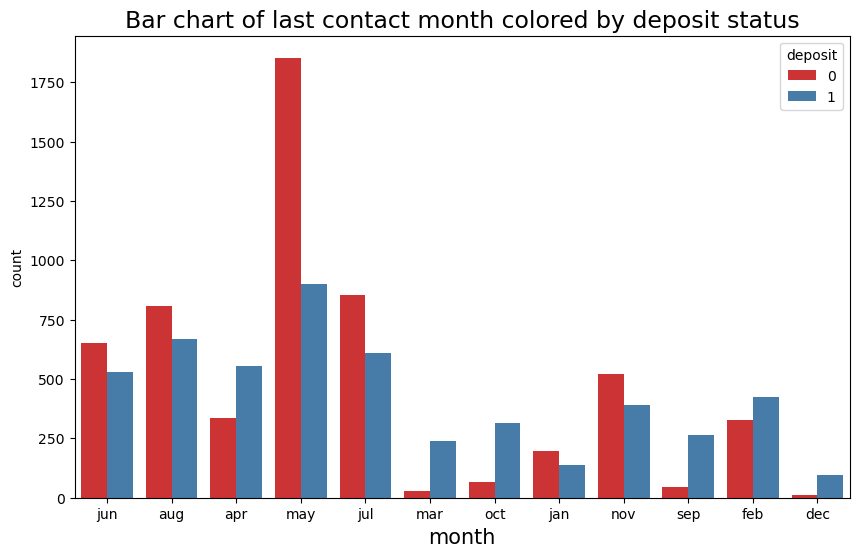

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(x='month',hue='deposit', data=data,palette='Set1')
plt.title("Bar chart of last contact month colored by deposit status", fontsize=17)
plt.xlabel("month", fontsize=15)

Text(0.5, 0, 'contact')

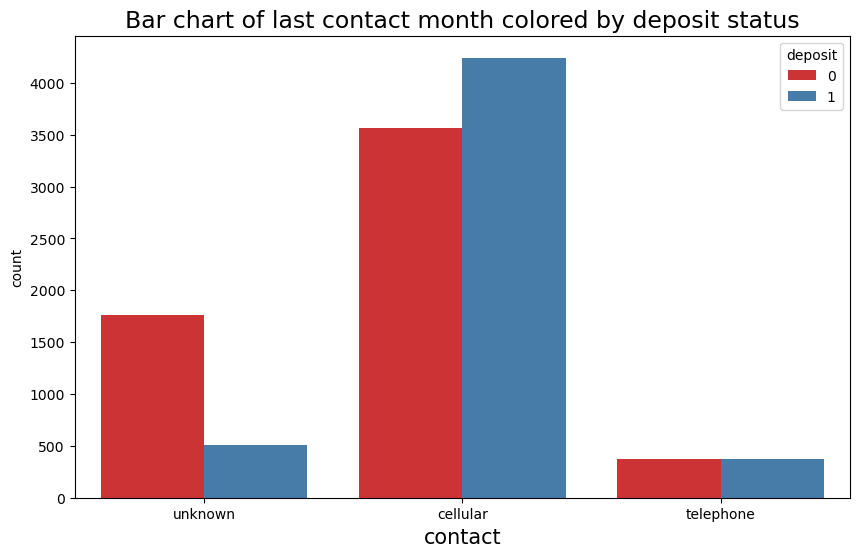

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(x='contact',hue='deposit', data=data,palette='Set1')
plt.title("Bar chart of last contact month colored by deposit status", fontsize=17)
plt.xlabel("contact", fontsize=15)

Text(0.5, 0, 'marital')

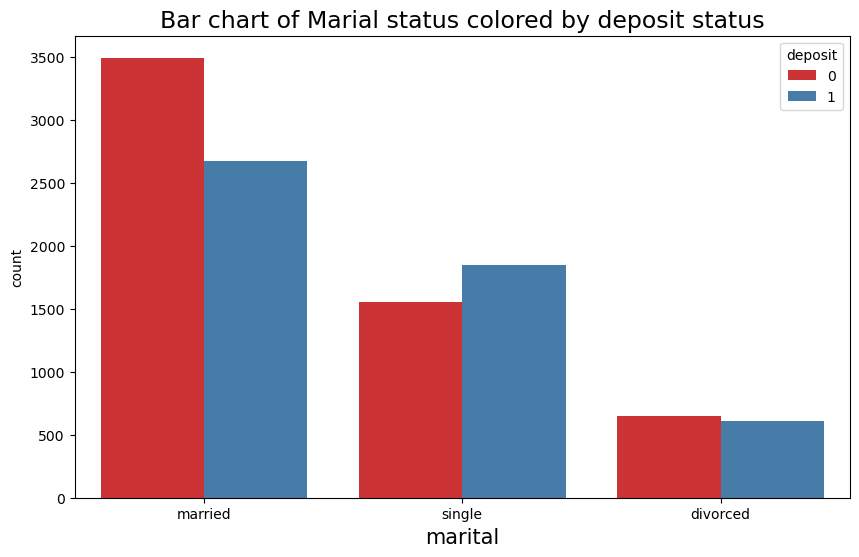

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(x='marital',hue='deposit', data=data,palette='Set1')
plt.title("Bar chart of Marial status colored by deposit status", fontsize=17)
plt.xlabel("marital", fontsize=15)

Text(0.5, 0, 'poutcome')

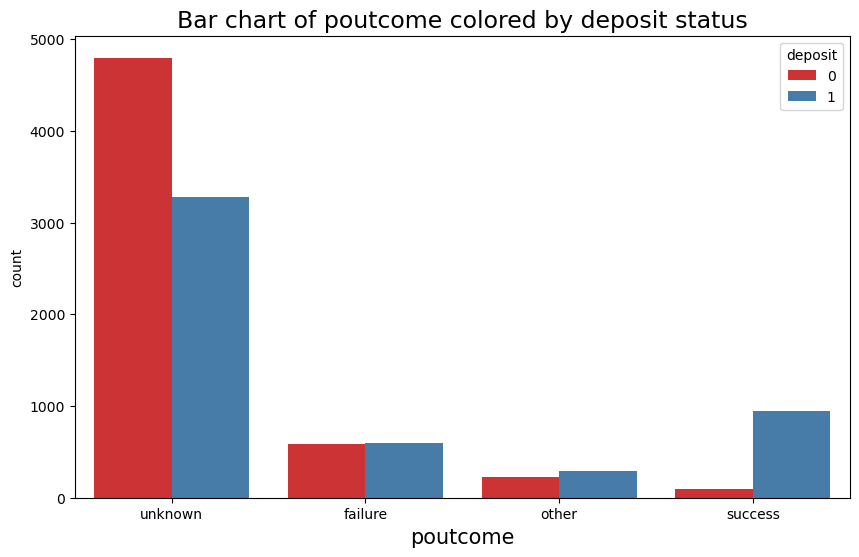

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(x='poutcome',hue='deposit', data=data,palette='Set1')
plt.title("Bar chart of poutcome colored by deposit status", fontsize=17)
plt.xlabel("poutcome", fontsize=15)

Text(0.5, 0, 'education')

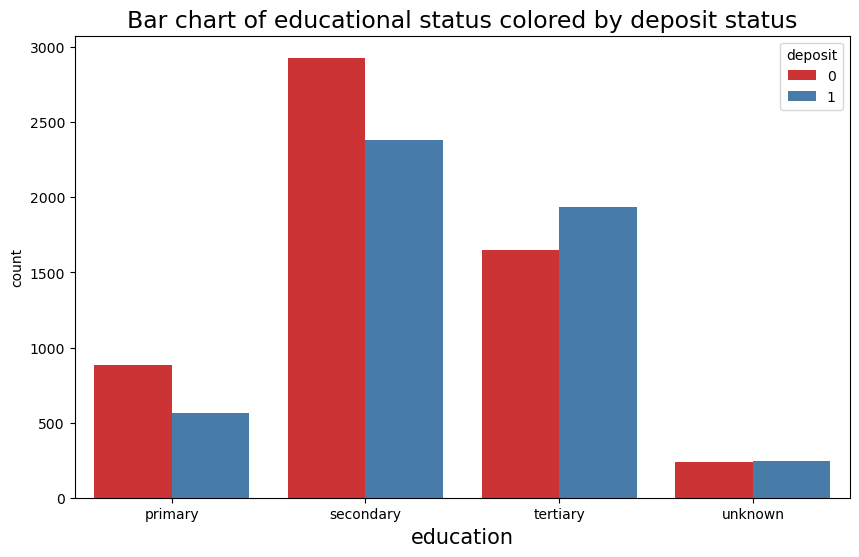

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(x='education',hue='deposit', data=data,palette='Set1')
plt.title("Bar chart of educational status colored by deposit status", fontsize=17)
plt.xlabel("education", fontsize=15)

Text(0.5, 0, 'job')

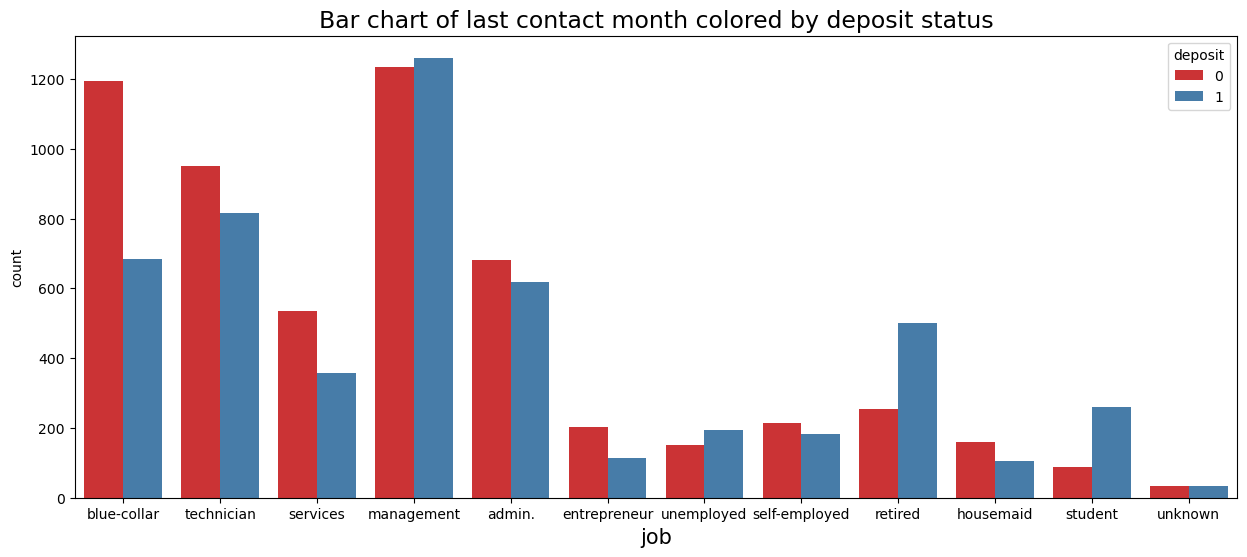

In [31]:
plt.figure(figsize=(15,6))
sns.countplot(x='job',hue='deposit', data=data,palette='Set1')
plt.title("Bar chart of last contact month colored by deposit status", fontsize=17)
plt.xlabel("job", fontsize=15)

Text(0, 0.5, 'Duration')

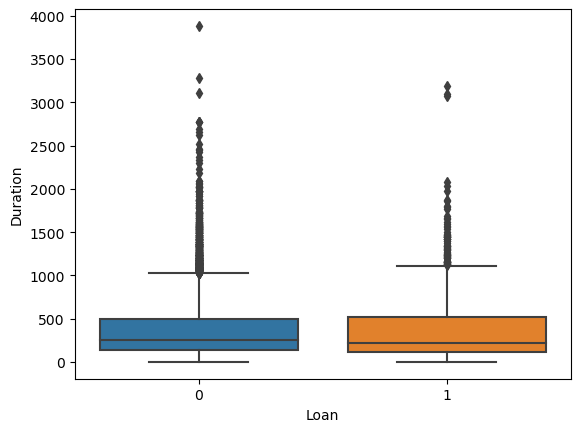

In [32]:
sns.boxplot(x=data['loan'],y=data['duration'])
plt.xlabel("Loan")
plt.ylabel("Duration")

In [33]:
data["pdays"].replace(-1,int(0),inplace=True)
data.head()

,age,job,marital,education,defaulter,balance,housing,loan,contact,day,month,duration,campaign,pdays,prev,poutcome,deposit
0,39,blue-collar,married,primary,0,-119,0,0,unknown,17,jun,135,6,0,0,unknown,0
1,31,technician,single,secondary,0,373,0,0,cellular,22,aug,346,5,0,0,unknown,0
2,30,services,married,secondary,0,292,1,1,cellular,15,apr,651,4,0,0,unknown,0
3,55,technician,divorced,secondary,1,284,1,0,cellular,7,aug,78,2,0,0,unknown,0
4,32,management,single,tertiary,0,311,0,0,unknown,12,may,757,2,0,0,unknown,1


In [34]:
data = data.drop(columns=['loan', 'housing', 'campaign'])
data.head()

,age,job,marital,education,defaulter,balance,contact,day,month,duration,pdays,prev,poutcome,deposit
0,39,blue-collar,married,primary,0,-119,unknown,17,jun,135,0,0,unknown,0
1,31,technician,single,secondary,0,373,cellular,22,aug,346,0,0,unknown,0
2,30,services,married,secondary,0,292,cellular,15,apr,651,0,0,unknown,0
3,55,technician,divorced,secondary,1,284,cellular,7,aug,78,0,0,unknown,0
4,32,management,single,tertiary,0,311,unknown,12,may,757,0,0,unknown,1


In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in data.columns:
    # Check if the column contains non-numeric data before applying LabelEncoder
    if data[col].dtype == 'O':  # 'O' stands for Object data type (typically used for strings)
        data[col] = le.fit_transform(data[col])
data

,age,job,marital,education,defaulter,balance,contact,day,month,duration,pdays,prev,poutcome,deposit
0,39,1,1,0,0,-119,2,17,6,135,0,0,3,0
1,31,9,2,1,0,373,0,22,1,346,0,0,3,0
2,30,7,1,1,0,292,0,15,0,651,0,0,3,0
3,55,9,0,1,1,284,0,7,1,78,0,0,3,0
4,32,4,2,2,0,311,2,12,8,757,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,47,4,1,2,0,761,0,11,5,80,0,0,3,0
10823,28,6,2,2,0,159,0,16,9,449,33,4,2,1
10824,35,9,1,1,0,1144,0,20,1,197,0,0,3,0
10825,51,5,1,2,0,746,0,25,1,372,0,0,3,1


In [36]:
data['job'].unique()

array([ 1,  9,  7,  4,  0,  2, 10,  6,  5,  3,  8, 11])

In [37]:
data['marital'].unique()

array([1, 2, 0])

In [38]:
data['education'].unique()

array([0, 1, 2, 3])

In [39]:
data['contact'].unique()

array([2, 0, 1])

In [40]:
data['month'].unique()

array([ 6,  1,  0,  8,  5,  7, 10,  4,  9, 11,  3,  2])

In [41]:
data['poutcome'].unique()

array([3, 0, 1, 2])

In [42]:
X=data.drop(columns=["day","deposit"])
Y=data["deposit"]

In [43]:
X

,age,job,marital,education,defaulter,balance,contact,month,duration,pdays,prev,poutcome
0,39,1,1,0,0,-119,2,6,135,0,0,3
1,31,9,2,1,0,373,0,1,346,0,0,3
2,30,7,1,1,0,292,0,0,651,0,0,3
3,55,9,0,1,1,284,0,1,78,0,0,3
4,32,4,2,2,0,311,2,8,757,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10822,47,4,1,2,0,761,0,5,80,0,0,3
10823,28,6,2,2,0,159,0,9,449,33,4,2
10824,35,9,1,1,0,1144,0,1,197,0,0,3
10825,51,5,1,2,0,746,0,1,372,0,0,3


In [44]:
Y

0        0
1        0
2        0
3        0
4        1
        ..
10822    0
10823    1
10824    0
10825    1
10826    0
Name: deposit, Length: 10827, dtype: int64

# preprocessing the data

In [45]:
from sklearn import preprocessing
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(X).transform(X)

array([[0.27272727, 0.09090909, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.16883117, 0.81818182, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.15584416, 0.63636364, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.22077922, 0.81818182, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.42857143, 0.45454545, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.15584416, 0.36363636, 1.        , ..., 0.        , 0.        ,
        1.        ]])

# Train Test Split

In [46]:
#Splitting the dataset into Training set and Test set
from sklearn import model_selection, neighbors
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [47]:
X_train

,age,job,marital,education,defaulter,balance,contact,month,duration,pdays,prev,poutcome
4070,46,1,1,1,0,4707,2,8,93,0,0,3
4186,42,1,1,1,0,790,2,8,356,0,0,3
3332,42,1,1,1,0,443,2,6,671,0,0,3
1169,31,9,2,2,0,-749,0,5,82,0,0,3
8768,32,9,1,1,0,616,0,1,118,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
8199,30,7,1,1,0,5,0,5,829,0,0,3
4879,26,0,2,1,0,1099,0,4,99,225,13,1
4648,58,5,1,0,0,0,0,1,506,0,0,3
4731,60,5,0,1,0,1091,0,5,441,0,0,3


In [48]:
Y_train

4070    0
4186    0
3332    1
1169    0
8768    0
       ..
8199    1
4879    0
4648    0
4731    1
68      0
Name: deposit, Length: 8661, dtype: int64

In [49]:
X_test

,age,job,marital,education,defaulter,balance,contact,month,duration,pdays,prev,poutcome
6152,40,0,2,2,0,1005,0,5,449,0,0,3
1401,71,5,1,2,0,653,1,11,471,189,1,2
4625,29,6,2,2,0,805,0,3,132,103,7,0
6234,32,9,2,1,0,-114,0,1,155,0,0,3
10028,55,0,1,1,0,8304,0,6,201,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10052,24,0,2,2,0,1141,2,8,230,0,0,3
8845,23,9,2,1,0,-782,2,6,197,0,0,3
4324,31,0,2,1,0,131,0,6,151,0,0,3
3759,43,4,1,2,0,78,0,9,36,109,1,1


In [50]:
Y_test

6152     0
1401     1
4625     1
6234     0
10028    1
        ..
10052    0
8845     0
4324     1
3759     0
4612     1
Name: deposit, Length: 2166, dtype: int64

# KNN classifier

In [51]:
#Fitting Classifier to the Training set
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train,Y_train)

KNeighborsClassifier()

In [52]:
Y_pred=clf.predict(X_test)

In [53]:
print('Actual Deposit ')
print(Y_test.values)

Actual Deposit 
[0 1 1 ... 1 0 1]


In [54]:
print('Predicted Deposit')
print(Y_pred)

Predicted Deposit
[1 1 1 ... 0 0 1]


In [55]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

knn_acc=accuracy_score(Y_test,Y_pred) * 100
print("\nAccuracy score: %f" %(accuracy_score(Y_test,Y_pred) * 100))
print("Recall score : %f" %(recall_score(Y_test, Y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(Y_test, Y_pred) * 100))
print(confusion_matrix(Y_test, Y_pred)) 




Accuracy score: 74.607572
Recall score : 74.000000
ROC score : 74.589606

[[839 277]
 [273 777]]


In [56]:

#Predict the probability of each test data point
#Get the probability distribution
probas = clf.predict_proba(X_test)

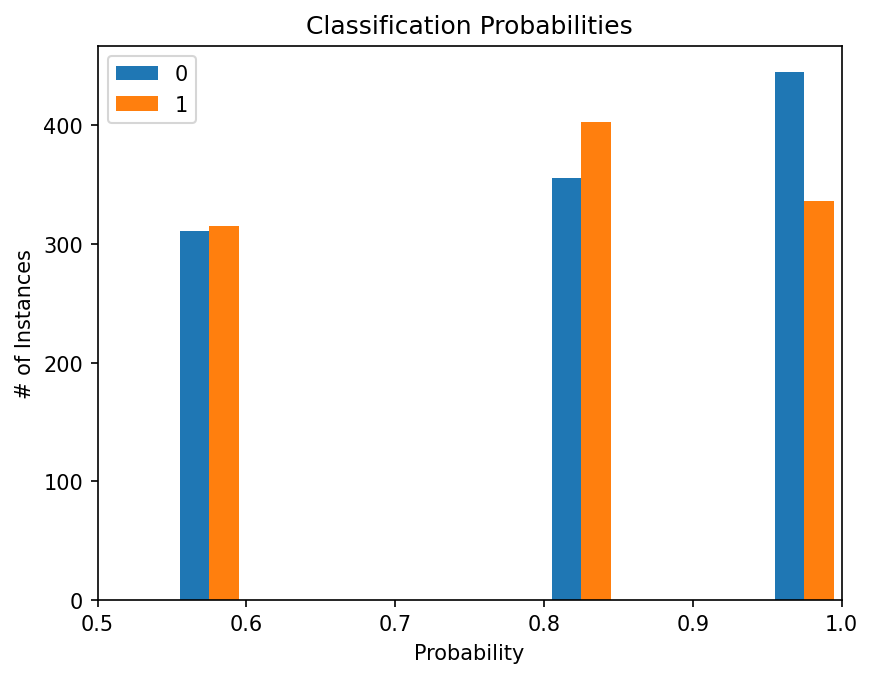

In [57]:
#Visualize the probabilities
# plot
import matplotlib.pyplot as plt
plt.figure(dpi=150)
plt.hist(probas, bins=20)
plt.title('Classification Probabilities')
plt.xlabel('Probability')
plt.ylabel('# of Instances')
plt.xlim([0.5, 1.0])
plt.legend(Y_test)
plt.show()

In [58]:
X_train_std = minmax.fit_transform(X_train)
X_test_std = minmax.transform(X_test)

In [59]:
#Evaluation Metrics
from sklearn.model_selection import cross_val_score,cross_val_predict

In [60]:
#Print cross validation score for kNN
clf_acc = cross_val_score(clf, X_train_std, Y_train, cv=3, scoring="accuracy",  n_jobs=-1)

In [61]:
clf_proba = cross_val_predict(clf, X_train_std, Y_train, cv=3, method='predict_proba')
clf_scores = clf_proba[:, 1] # get the score of the positive class 

In [62]:
clf_acc

array([0.75684101, 0.73779009, 0.75303083])

#  Logistic Regression

In [63]:
#Build a Logistic Regression Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)
lr_acc = cross_val_score(lr, X_train_std, Y_train, cv=3, scoring='accuracy', n_jobs=-1)
lr_proba = cross_val_predict(lr, X_train_std, Y_train, cv=3, method='predict_proba')
lr_scores = lr_proba[:, 1]

/home/entelekheia/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
lr_acc

array([0.76376862, 0.76550052, 0.77381365])

In [65]:
#Predict on test data
Y_pred=lr.predict(X_test)

In [66]:
print('Actual Deposit ')
print(Y_test.values)

Actual Deposit 
[0 1 1 ... 1 0 1]


In [67]:
print('Predicted Deposit')
print(Y_pred)

Predicted Deposit
[1 0 1 ... 0 0 1]


In [68]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
acc_lr=accuracy_score(Y_test,Y_pred) * 100
print("\nAccuracy score: %f" %(accuracy_score(Y_test,Y_pred) * 100))
print("Recall score : %f" %(recall_score(Y_test, Y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(Y_test, Y_pred) * 100))
print(confusion_matrix(Y_test, Y_pred))


Accuracy score: 74.422899
Recall score : 69.714286
ROC score : 74.283666

[[880 236]
 [318 732]]


In [69]:
from sklearn.metrics import roc_auc_score,roc_curve
def ROC_curve(title, Y_train, scores, label=None):
    # calculate the ROC score
    fpr, tpr, thresholds = roc_curve(Y_train, scores)
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(Y_train, scores)))
    
    # plot the ROC curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve: {}'.format(title), fontsize=16)
    plt.show()

# Decision Tree

In [70]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc_clf = DecisionTreeClassifier()
dtc_clf.fit(X_train,Y_train)

#Print cross validation score for Decision Tree Calssifier
dtc_clf_acc = cross_val_score(dtc_clf, X_train_std, Y_train, cv=3, scoring="accuracy",  n_jobs=-1)
dtc_proba = cross_val_predict(dtc_clf, X_train_std, Y_train, cv=3, method='predict_proba')
dtc_clf_scores = dtc_proba[:, 1]
dtc_clf_acc

array([0.77000346, 0.74783512, 0.76342224])

In [71]:
#Predict on test data
Y_pred=dtc_clf.predict(X_test)

In [72]:
print('Actual Deposit ')
print(Y_test.values)

Actual Deposit 
[0 1 1 ... 1 0 1]


In [73]:
print('Predicted Deposit')
print(Y_pred)

Predicted Deposit
[0 1 1 ... 0 0 1]


In [74]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
acc_dt=accuracy_score(Y_test,Y_pred) * 100
print("\nAccuracy score: %f" %(accuracy_score(Y_test,Y_pred) * 100))
print("Recall score : %f" %(recall_score(Y_test, Y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(Y_test, Y_pred) * 100))
print(confusion_matrix(Y_test, Y_pred)) 


Accuracy score: 75.807941
Recall score : 74.571429
ROC score : 75.771377

[[859 257]
 [267 783]]


In [75]:
dtc_clf_acc

array([0.77000346, 0.74783512, 0.76342224])

# Random Forest

In [76]:
#Build Random Forest Calssifier
from sklearn.ensemble import RandomForestClassifier
rmf = RandomForestClassifier(max_depth=2, random_state=0)
rmf_clf = rmf.fit(X_train, Y_train)

In [77]:
#Print cross validation score for Random Forest Calssifier
rmf_clf_acc = cross_val_score(rmf_clf, X_train_std, Y_train, cv=3, scoring="accuracy",  n_jobs=-1)
rmf_proba = cross_val_predict(rmf_clf, X_train_std, Y_train, cv=3, method='predict_proba')
rmf_clf_scores = rmf_proba[:, 1]
rmf_clf_acc

array([0.77416003, 0.75510911, 0.77034984])

In [78]:
#Predict on test data
Y_pred=rmf.predict(X_test)

In [79]:
print('Actual Deposit ')
print(Y_test.values)

Actual Deposit 
[0 1 1 ... 1 0 1]


In [80]:
print('Predicted Deposit')
print(Y_pred)

Predicted Deposit
[1 1 1 ... 0 0 1]


In [81]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
acc_rmf=accuracy_score(Y_test,Y_pred) * 100
print("\nAccuracy score: %f" %(accuracy_score(Y_test,Y_pred) * 100))
print("Recall score : %f" %(recall_score(Y_test, Y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(Y_test, Y_pred) * 100))
print(confusion_matrix(Y_test, Y_pred)) 


Accuracy score: 75.530933
Recall score : 71.904762
ROC score : 75.423707

[[881 235]
 [295 755]]


In [82]:
acc_rmf

75.53093259464451

In [83]:
from sklearn.metrics import roc_auc_score,roc_curve
def ROC_curve(title, Y_train, scores, label=None):
    # calculate the ROC score
    fpr, tpr, thresholds = roc_curve(Y_train, scores)
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(Y_train, scores)))
    
    # plot the ROC curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve: {}'.format(title), fontsize=16)
    plt.show()

# svm

In [84]:
# Build Support Vector Classification
from sklearn.svm import SVC
svc = SVC(kernel='rbf',probability = True)
svc_classifier = svc.fit(X_train,Y_train)

In [85]:
#Print cross validation score for SVC
svc_acc = cross_val_score(svc_classifier, X_train_std, Y_train, cv=3, scoring="accuracy",  n_jobs=-1)
svc_proba = cross_val_predict(svc_classifier, X_train_std, Y_train, cv=3, method='predict_proba')
svc_scores = svc_proba[:, 1]

In [86]:
svc_acc
svc_scores

array([0.0548363 , 0.16861986, 0.5077952 , ..., 0.67267508, 0.69060104,
       0.19377729])

In [87]:
#Predict on test data
Y_pred=svc_classifier.predict(X_test)

In [88]:
print('Actual deposit')
print(Y_test.values)

Actual deposit
[0 1 1 ... 1 0 1]


In [89]:
print('Predicted deposit')
print(Y_pred)

Predicted deposit
[1 1 0 ... 0 0 1]


In [90]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
acc_svm=accuracy_score(Y_test,Y_pred) * 100
print("\nAccuracy score: %f" %(accuracy_score(Y_test,Y_pred) * 100))
print("Recall score : %f" %(recall_score(Y_test, Y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(Y_test, Y_pred) * 100))
print(confusion_matrix(Y_test, Y_pred)) 


Accuracy score: 73.499538
Recall score : 66.285714
ROC score : 73.286226

[[896 220]
 [354 696]]


AUC Score (kNN): 0.82 


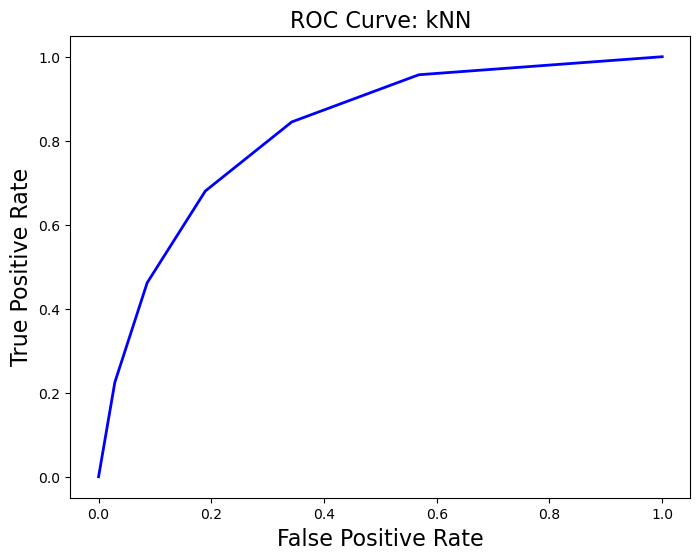

AUC Score (Logistic Regression): 0.85 


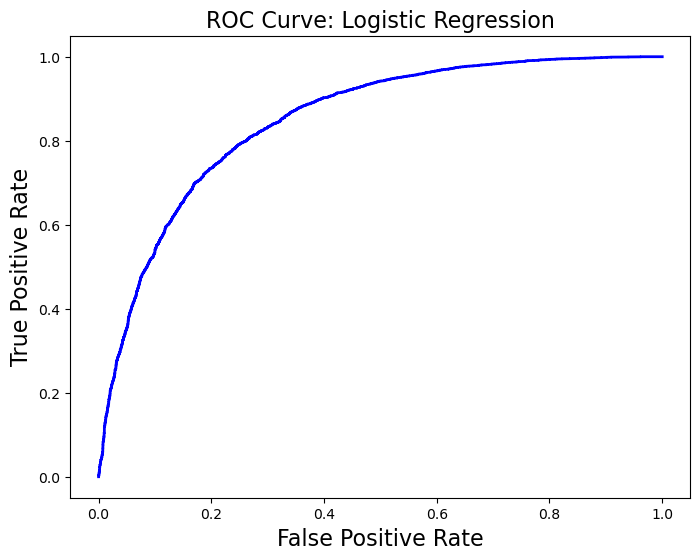

AUC Score (Support Vector Classification): 0.88 


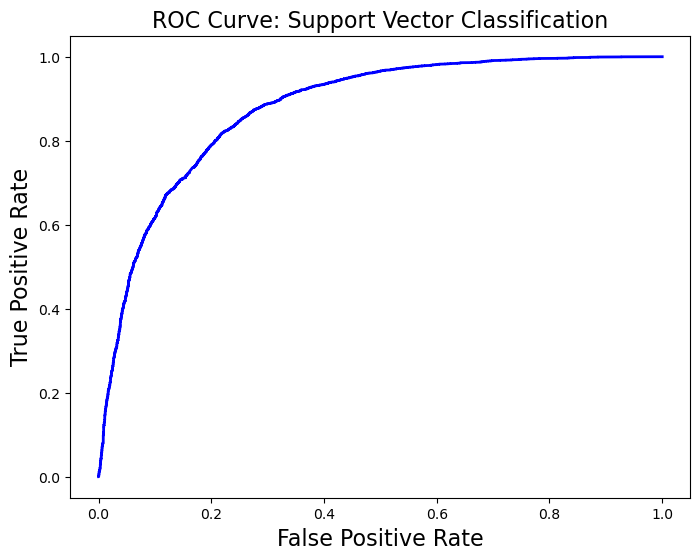

AUC Score (Decision Tree Classifier): 0.76 


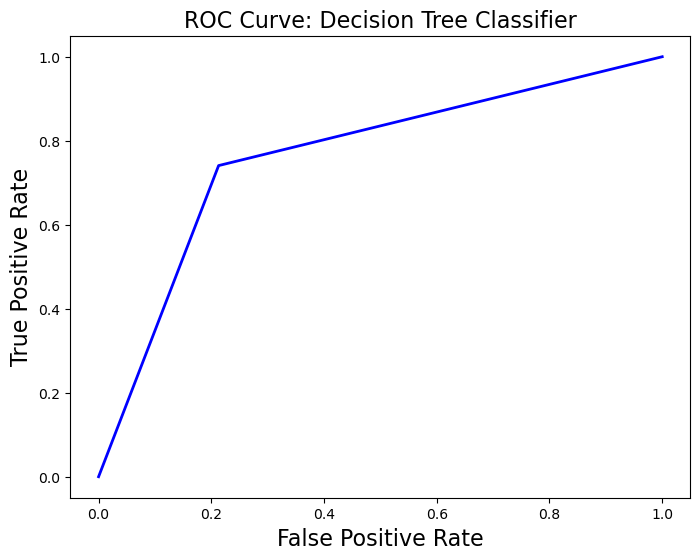

AUC Score (Random Forest Classifier): 0.85 


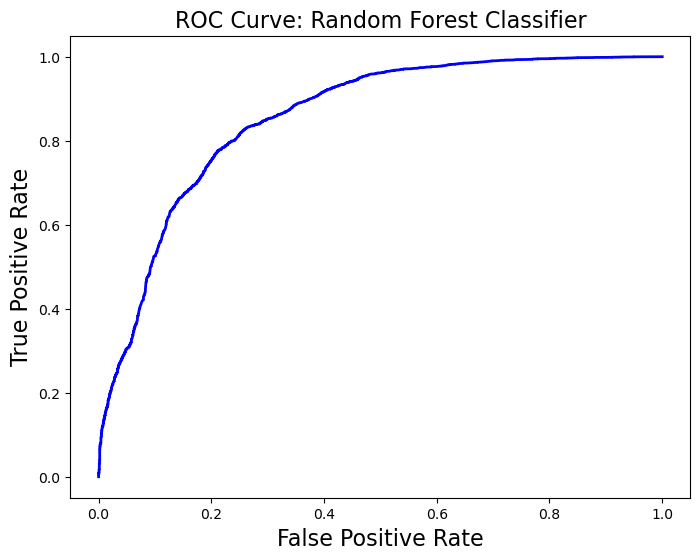

In [91]:
#Plot ROC Curve for each algorithm
ROC_curve('kNN', Y_train, clf_scores)
ROC_curve('Logistic Regression', Y_train, lr_scores)
ROC_curve('Support Vector Classification',Y_train,svc_scores)
ROC_curve('Decision Tree Classifier',Y_train,dtc_clf_scores)
ROC_curve('Random Forest Classifier',Y_train,rmf_clf_scores)

In [92]:

import joblib

# Save the trained Logistic Regression model
joblib.dump(lr, 'logistic_regression_model.joblib')

['logistic_regression_model.joblib']

In [93]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

wml_credentials = {
   "instance_id": "3281aeea-4dc6-41cb-9f39-1f1d2b5761b8",
  "password": "2492ccc8-7ed1-434d-af69-0a170fe6a4aa",
  "url": "https://eu-gb.ml.cloud.ibm.com",
  "username": "16752374-b3a2-4623-b3f1-a91af0ff5806"
}

client = WatsonMachineLearningAPIClient(wml_credentials)
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Koklim", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "oukoklim@gmail.com", 
               client.repository.ModelMetaNames.NAME: "Bank Model"
              }

model=client.repository.store_model(lr, meta_props=model_props)

published_model_uid = client.repository.get_model_uid(model)
published_model_uid

deployment = client.deployments.create(published_model_uid, name="Retail Banking")

scoring_endpoint = client.deployments.get_scoring_url(deployment)
scoring_endpoint

ModuleNotFoundError: No module named 'watson_machine_learning_client'

In [ ]:
client.deployments.list()

In [ ]:
client.deployments.delete("")